In [ ]:
import pandas as pd

data = pd.read_csv("C:\\Users\hdmqu\Documents\Project\Heart_failure_detection\heart.csv") 
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1, random_state=42)

train_y = train["HeartDisease"].copy()
train_X = train.drop("HeartDisease", axis = 1)
test_y = test["HeartDisease"].copy()
test_X = test.drop("HeartDisease", axis = 1)
print(train_X[:5], "\n", type(train_X))

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
557   56   M           NAP        137          208          1         ST   
260   46   M           ATA        140          275          0     Normal   
235   39   M           ATA        120          200          0     Normal   
218   55   M           ATA        140          196          0     Normal   
382   43   M           ASY        115            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
557    122              Y      1.8     Flat  
260    165              Y      0.0       Up  
235    160              Y      1.0     Flat  
218    150              N      0.0       Up  
382    145              Y      2.0     Flat   
 <class 'pandas.core.frame.DataFrame'>


TypeError: pie() got an unexpected keyword argument 'labelcol'

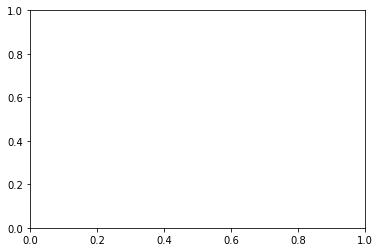

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

female_with_disease = data[(data["Sex"] == "F") & (data["HeartDisease"] == 1)].count()
male_with_disease = data[(data["Sex"] == "M") & (data["HeartDisease"] == 1)].count()
fig, ax = plt.subplots()
f, m = female_with_disease[0], male_with_disease[0]
ax.pie([f, m],
        labels=["Female\n" + str(round(100*f / (f + m), 2)) + "%", 
                "Male\n" + str(round(100*m / (f + m), 2)) + "%"], 
        explode=[0.2, 0], labeldistance=0.5)
ax.legend(["Female", "Male"],
        title="Gender",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Age'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Age'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='Age'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Age'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Age'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>],
       [<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Cholesterol'>

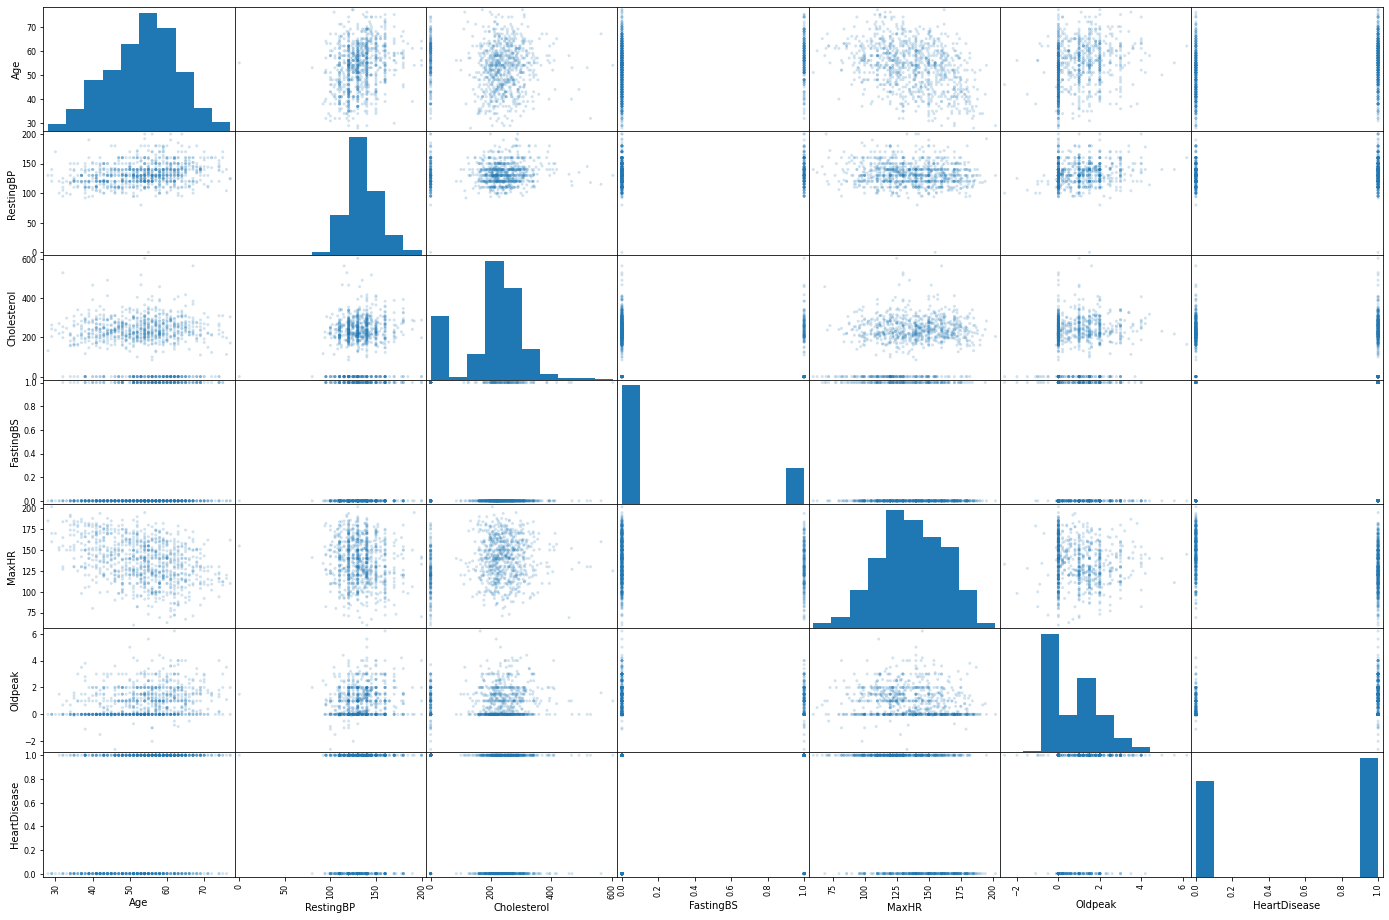

In [ ]:
from pandas.plotting import scatter_matrix

att = ["Age", "RestingBP", "Cholesterol", "FastingBS","MaxHR","Oldpeak", "HeartDisease"]
scatter_matrix(data[att], figsize=(24, 16), alpha=0.2)

In [ ]:
print(data.corr()["HeartDisease"].sort_values(ascending=False))

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_att = list(train_X._get_numeric_data().columns)
cat_att = list(set(train_X.columns) - set(train_X._get_numeric_data().columns))

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", OneHotEncoder(), cat_att),
])

In [ ]:
def train_model_score(*args):
    from sklearn.model_selection import cross_val_score
    
    for i in range(0, len(args)):
        scores = cross_val_score(args[i], train_X_prep, train_y, 
        scoring="accuracy", cv=10)

        print(type(args[i]).__name__, ":")
        print("Score: ", scores)
        print("Mean: ", scores.mean())
        print("Standard Deviation: ", scores.std(), "\n")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

train_X_prep = full_pipeline.fit_transform(train_X)


In [ ]:
def train_s_model_score(model):
    from sklearn.model_selection import cross_val_score
    
    scores = cross_val_score(model, train_X_prep, train_y, 
    scoring="accuracy", cv=10)

    print(type(model).__name__, ":")
    print("Score: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std(), "\n")

In [ ]:
from sklearn.ensemble import StackingClassifier
# define the base models
level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier()))
level_0.append(('rfc', RandomForestClassifier()))
level_0.append(('bayes', GaussianNB()))
# define meta learner model
level_1 = LogisticRegression()
# define the stacking ensemble
stacked_model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

train_s_model_score(stacked_model)

StackingClassifier :
Score:  [0.87951807 0.91566265 0.87951807 0.92771084 0.87951807 0.8313253
 0.85365854 0.84146341 0.8902439  0.85365854]
Mean:  0.8752277402292096
Standard Deviation:  0.029441601509507878 



In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {"knn__n_neighbors": [3, 4, 5, 6, 7, 8],
            "rfc__n_estimators": [50, 100, 150, 200]}

stacked_model_grid = GridSearchCV(estimator=stacked_model,
                        param_grid=param_grid,
                        cv=10, verbose=1,
                        scoring="accuracy")
stacked_model_grid.fit(train_X_prep, train_y)
stacked_model_grid.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'knn__n_neighbors': 3, 'rfc__n_estimators': 150}

In [ ]:
from sklearn.metrics import mean_squared_error

final_model =stacked_model_grid.best_estimator_
test_X_pred = full_pipeline.fit_transform(test_X)

final_pred = final_model.predict(test_X_pred)

final_rmse = mean_squared_error(test_y, final_pred, squared=False)
print(final_rmse)

0.3296902366978935


In [ ]:
import sklearn.externals
import joblib

joblib.dump(final_model, "stacked_model.pkl")

['stacked_model.pkl']